## Load & Import Data

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Reading Data
data = pd.read_csv("titanicdata.csv")

# Operation check
data.shape

(1310, 14)

## Basic Info About Datasets

In [3]:
# data head
data.head(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"


In [4]:
# data tail
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# data shape
data.shape

(1310, 14)

#### Observations -

* We have 1310 entries along 1st dimension ( Axis = 0) which is rows/datapoints/samples and 14 entries along 2nd dimension ( Axis = 1 ) which is columns/features .

In [6]:
# datatype
data.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
# Describe for numerical columns
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
# Describe for categorical columns
data.describe(include = "object")

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [9]:
# column info
data.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#### Functions to Extract Dtype Based Columns:

In [10]:
def extractNumCol(data):
    num_df = data.select_dtypes(include=['number'])
    num_col=list(num_df.columns)
    return num_col

In [11]:
# Operation Check
extractNumCol(data)

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

#### Observations -

* We have 7 numerical features which contains numerical data .

In [12]:
def extractObjCol(data):
    obj_df = data.select_dtypes(include=['object'])
    obj_col=list(obj_df.columns)
    return obj_col

In [13]:
# Operation Check
extractObjCol(data)

['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']

#### Observations -

* We have 7 categorical features which contains categorical data .

In [14]:
#Let's check unique values in dataset - 
data.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

#### Observations - 

* We get how many unique values are present in each columns .

In [15]:
#Let's check datatypes of all the attributes - 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


#### Observations -

* From above output we can see there are 9 features , labled from 0 to 8 .
* It also tells us non - null count . (Non - missing values count) .

* It is basically count of non missing values and if you notice this , we have missing values in our dataset .

* We can conclude we have missing values in our dataset .

#### Functions to check null values:

In [16]:
def null_value_check(data):
    column_name = []
    total_na = []
    
    for col in data.columns:
        
        column_name.append(col)
        
        na_count = data[col].isna().sum()
        total_na.append(na_count)

        tempdf = pd.DataFrame({'Column_Name': column_name, 'Total NA':total_na})
        tempdf['%'] = round(tempdf['Total NA'] / len(data) * 100, 2)
    return tempdf  

In [17]:
null_value_check(data)

,Column_Name,Total NA,%
0,pclass,1,0.08
1,survived,1,0.08
2,name,1,0.08
3,sex,1,0.08
4,age,264,20.15
5,sibsp,1,0.08
6,parch,1,0.08
7,ticket,1,0.08
8,fare,2,0.15
9,cabin,1015,77.48


<AxesSubplot:>

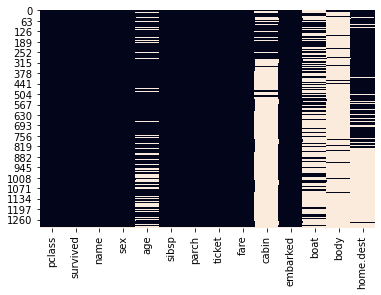

In [18]:
# Null Visualization
sns.heatmap(data.isnull(), cbar=False)

## Data Cleaning
As we can see there are lots of column with significant missing values. Its very much necessary for us to fix them before start doing EDA and if possible feature engineering.

### Handling Null Values

In [19]:
null_value_check(data)

,Column_Name,Total NA,%
0,pclass,1,0.08
1,survived,1,0.08
2,name,1,0.08
3,sex,1,0.08
4,age,264,20.15
5,sibsp,1,0.08
6,parch,1,0.08
7,ticket,1,0.08
8,fare,2,0.15
9,cabin,1015,77.48


There are columns which contains more missing values than actual values. These columns are difficult to get treated. Thus we will remove such columns from the dataset.

In [20]:
# Remove Operation
data.drop(['body', 'cabin', 'boat', 'home.dest'], axis=1, inplace=True)

In [21]:
#Operation check
null_value_check(data)

,Column_Name,Total NA,%
0,pclass,1,0.08
1,survived,1,0.08
2,name,1,0.08
3,sex,1,0.08
4,age,264,20.15
5,sibsp,1,0.08
6,parch,1,0.08
7,ticket,1,0.08
8,fare,2,0.15
9,embarked,3,0.23


The remaining columns contains very less null values. These null values can be treated by using right techniques. We will use different techniques to fill these NA values in the dataset.

### Fixing Age Feature
Before we fix the null values in age, we must create another feature named 'Title'. It will be easy for us to impute the missing values with the help of Title variable.



In [22]:
import re
titles = []
for n in data['name'].dropna().values:
    t = ''.join(re.findall(r'(?<=,\s)[a-z]+',n,re.I))
    titles.append(t)

In [23]:
#Creating column out of extracted titles
data['Title'] = pd.Series(titles)

In [24]:
# Shape
data.shape

(1310, 11)

In [25]:
# This will replace NA values in Age with median age of that Title Category.
df = pd.DataFrame(data=None, columns=data.columns)
temp = []

for t in data['Title'].unique():
    tempDF = data[data['Title']==t]
    tempDF['age'].fillna(tempDF['age'].median(), inplace=True)
    temp.append(tempDF)
    
# Append it to DF
df = pd.concat(temp)

C:\Users\Shubham\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
# Processing Title
data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Jonkheer      1
Don           1
Mme           1
Lady          1
the           1
Capt          1
Sir           1
Dona          1
Name: Title, dtype: int64

#### Inspecting Each Title:



In [27]:
df[df['Title']=='Lady']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title
99,1.0,1.0,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1.0,0.0,11755,39.6,C,Lady


In [28]:
# Rename some of the titles as we received info from internet (As we have received info from titanic encyclopedia)
df['Title'].replace({'the':'Mrs', 'Dona':'Mrs', 'Ms':'Miss', 'Mlle':'Miss', 'Capt':'Major', 'Don':'Mr', 
                     'Sir':'Mr', 'Mme':'Miss', 'Jonkheer':'Mr', 'Lady':'Mrs'}, inplace=True)

In [29]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,C,Miss
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C,Mr
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C,Mr
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,S,Mr


In [30]:
# Keeping back values of DF to titanic
data = df.copy()

In [31]:
# Nullcheck
null_value_check(data)

,Column_Name,Total NA,%
0,pclass,0,0.00
1,survived,0,0.00
2,name,0,0.00
3,sex,0,0.00
4,age,0,0.00
5,sibsp,0,0.00
6,parch,0,0.00
7,ticket,0,0.00
8,fare,1,0.08
9,embarked,2,0.15


#### Lets investigate what are the 2 values are in null in embarked feature and 1 in fare features.

In [32]:
# Missing in embarked?
data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,NaN,Miss
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,NaN,Mrs


Now we will replace embarked with the port where most of the pclass = 1 people get embarked.

In [33]:
data.groupby(['embarked', 'pclass'])['pclass'].count()

embarked  pclass
C         1.0       141
          2.0        28
          3.0       101
Q         1.0         3
          2.0         7
          3.0       113
S         1.0       177
          2.0       242
          3.0       495
Name: pclass, dtype: int64

Thus most people get boarded into ship from port S. We will add that in our missing values.

In [34]:
# Fill embarked as 'S' in missing value
data['embarked'].fillna('S', inplace=True)

In [35]:
null_value_check(data)

,Column_Name,Total NA,%
0,pclass,0,0.00
1,survived,0,0.00
2,name,0,0.00
3,sex,0,0.00
4,age,0,0.00
5,sibsp,0,0.00
6,parch,0,0.00
7,ticket,0,0.00
8,fare,1,0.08
9,embarked,0,0.00


In [36]:
# Missing in fare?
data[data['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,S,Mr


So Mr. Thomas was traveling through 3rd class. We will take median of 3rd class ticket and we will add that to in the place of missing value.

In [37]:
# Filling Na value
data['fare'].fillna(data[data['pclass']==3]['fare'].median(), inplace=True)

In [38]:
null_value_check(data)

,Column_Name,Total NA,%
0,pclass,0,0.0
1,survived,0,0.0
2,name,0,0.0
3,sex,0,0.0
4,age,0,0.0
5,sibsp,0,0.0
6,parch,0,0.0
7,ticket,0,0.0
8,fare,0,0.0
9,embarked,0,0.0


<AxesSubplot:>

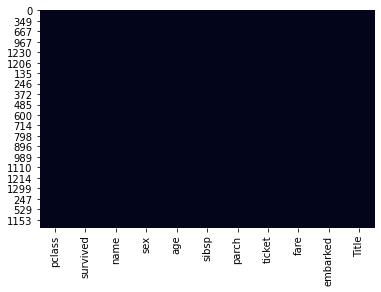

In [39]:
# Null Visualization
sns.heatmap(data.isnull(), cbar=False)

Thus we have handled missing value proble that was present in our dataset.

In [40]:
#Operation check
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,S,Miss
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.5500,S,Miss
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0,1.0,0.0,13502,77.9583,S,Miss
13,1.0,1.0,"Barber, Miss. Ellen ""Nellie""",female,26.0,0.0,0.0,19877,78.8500,S,Miss
18,1.0,1.0,"Bazzani, Miss. Albina",female,32.0,0.0,0.0,11813,76.2917,C,Miss
...,...,...,...,...,...,...,...,...,...,...,...
476,2.0,0.0,"Lahtinen, Rev. William",male,30.0,1.0,1.0,250651,26.0000,S,Rev
507,2.0,0.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S,Rev
532,2.0,0.0,"Peruschitz, Rev. Joseph Maria",male,41.0,0.0,0.0,237393,13.0000,S,Rev
546,2.0,1.0,"Reynaldo, Ms. Encarnacion",female,28.0,0.0,0.0,230434,13.0000,S,Miss


## Duplication

In [41]:
# Lets check how many duplicate records we have in our dataset -

duplicate_records = data[data.duplicated()]
print(duplicate_records)

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, embarked, Title]
Index: []


In [42]:
# Function to count duplicate values
def duplicateValues(data, column_name):
        from collections import Counter
        col_list = list(data[column_name].values)
        count_dict = dict(Counter(col_list))
        duplicateDF = pd.DataFrame(count_dict.items(), columns=[column_name, 'Duplicate Value Count'])
        return duplicateDF[duplicateDF['Duplicate Value Count'] > 1]

In [43]:
duplicateValues(data, 'name')

,name,Duplicate Value Count
138,"Connolly, Miss. Kate",2
837,"Kelly, Mr. James",2


Thus name variable contains two duplicate values. Lets delete one and keep one.

In [44]:
# It will keep first value and drop all other duplicate values.
data.drop_duplicates(subset='name', keep='first', inplace=True)

# Operation check
duplicateValues(data, 'name')

,name,Duplicate Value Count


## Deleting ID / Name columns
In our ML problems name and ticket ID columns is useless as they don't add any usefull information in our model. Lets delete them.

In [45]:
# Deleting useless columns
data.drop(['name', 'ticket'], inplace=True, axis=1)

In [46]:
# Operation check
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title
0,1.0,1.0,female,29.0,0.0,0.0,211.3375,S,Miss
2,1.0,0.0,female,2.0,1.0,2.0,151.5500,S,Miss
6,1.0,1.0,female,63.0,1.0,0.0,77.9583,S,Miss
13,1.0,1.0,female,26.0,0.0,0.0,78.8500,S,Miss
18,1.0,1.0,female,32.0,0.0,0.0,76.2917,C,Miss


## Backup 

In [47]:
# Taking backup in 'backup' variable
backup = data.copy()

## Feature Engineering
We have already created 'Title' feature in above step. Now we will create feature called 'AgeGroup' to accomodate the hidden information of age feature.

In [48]:
# Function to classify age
def classifyAge(row):
    if row['age'] >= 0.0 and row['age'] <13.0:
        return 'Child'
    elif row['age'] >= 13.0 and row['age'] < 19.0:
        return 'Adolescence'
    elif row['age'] >= 19.0 and row['age'] < 60.0:
        return 'Adult'
    else:
        return 'Senior Citizen'

In [49]:
# Apply function
data['AgeGroup'] = data.apply(classifyAge, axis=1)

In [50]:
# Operation check
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title,AgeGroup
0,1.0,1.0,female,29.0,0.0,0.0,211.3375,S,Miss,Adult
2,1.0,0.0,female,2.0,1.0,2.0,151.5500,S,Miss,Child
6,1.0,1.0,female,63.0,1.0,0.0,77.9583,S,Miss,Senior Citizen
13,1.0,1.0,female,26.0,0.0,0.0,78.8500,S,Miss,Adult
18,1.0,1.0,female,32.0,0.0,0.0,76.2917,C,Miss,Adult


## EDA
The main goal of EDA to understand data thoroughly. Once we understood data then the other process like feature engineering or model building will become more easier.

#### Count Plot

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shubham\anaconda

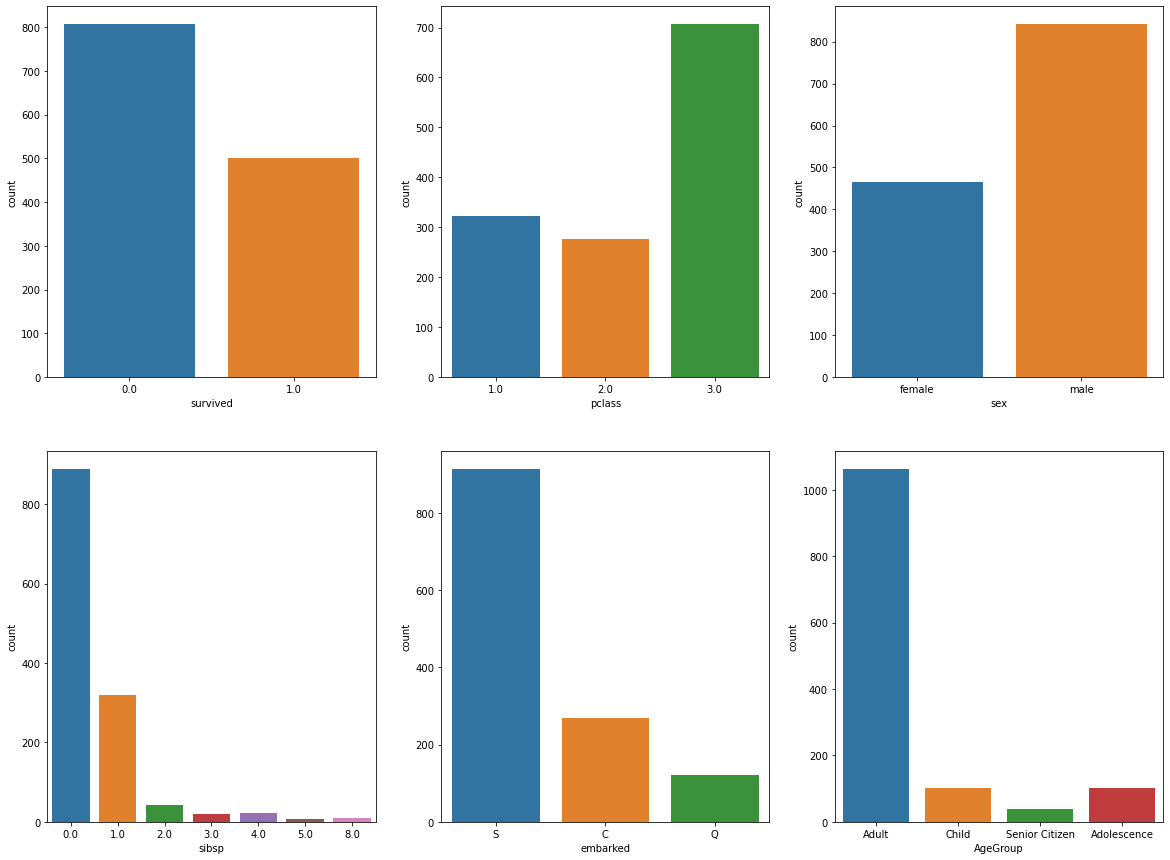

In [51]:
# Count PLot Function
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
sns.countplot('survived', data=data, ax=ax[0][0])
sns.countplot('pclass', data=data, ax=ax[0][1])
sns.countplot('sex', data=data, ax=ax[0][2])
sns.countplot('sibsp', data=data, ax=ax[1][0])
sns.countplot('embarked', data=data, ax=ax[1][1])
sns.countplot('AgeGroup', data=data, ax=ax[1][2]);

### Lets inspect each variable that present in our dataset.

#### Survived - Target Variable
* 0 = No
* 1 = Yes

In [53]:
# Value Counts
data['survived'].value_counts()

0.0    807
1.0    500
Name: survived, dtype: int64

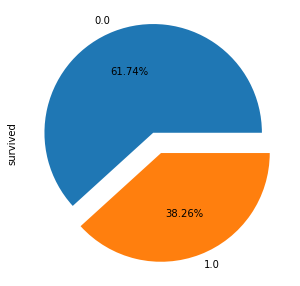

In [54]:
# Pie Plot
fig, ax = plt.subplots(figsize=(5,5))
ex=[0.1,0.1]
data['survived'].value_counts().plot.pie(autopct='%1.2f%%', explode=ex);

### Observations:

* Titanic survived rate is 38.20%
* There are more casualities (i.e 62%) than survivals (i.e. 38.20%)

### Pclass

#### pclass: A proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

In [55]:
# How many values each category has?
data['pclass'].value_counts()

3.0    707
1.0    323
2.0    277
Name: pclass, dtype: int64

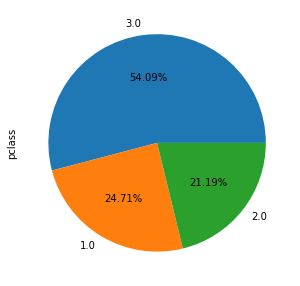

In [56]:
# Pie Chart
fig, ax = plt.subplots(figsize=(5,5))
data['pclass'].value_counts().plot.pie(autopct='%1.2f%%');


#### How many people had survived in each category of passenger class?

In [57]:
# How many people are survived in each passenger class?
data.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1.0     0.0         123
        1.0         200
2.0     0.0         158
        1.0         119
3.0     0.0         526
        1.0         181
Name: survived, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


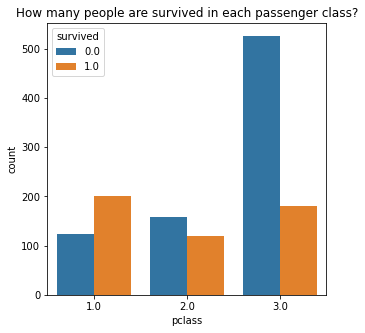

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot('pclass', data=data, hue='survived')
plt.title('How many people are survived in each passenger class?')
plt.show();

#### Observation:

* The most casulaties happened in 3rd class.
* Survival rate was high in first class.

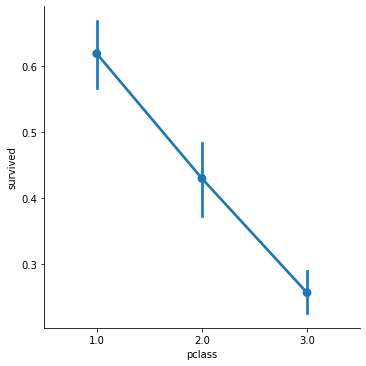

In [59]:
# Probabilities of survival
sns.catplot(x='pclass', y='survived', kind='point', data=data);

#### Observation:

* Nearly 62% people from first class survived in Titanic Disaster.
* Approx. 43% people from second class survived in Titanic Disaster.
* Approx. 15% people from third class survived in itanic Disaster.

### Gender

In [60]:
#value counts
data['sex'].value_counts()

male      842
female    465
Name: sex, dtype: int64

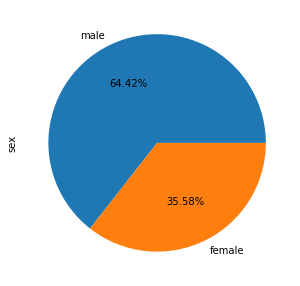

In [61]:
# Pie Chart
fig, ax = plt.subplots(figsize=(5,5))
data['sex'].value_counts().plot.pie(autopct='%1.2f%%');

#### Observstions:

* There are more male travelers than female.
* Total % of males travelers are 64.40% compared with 36% female travelers.

### How many male and female had survived?

In [62]:
# Groupby
data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0.0         126
        1.0         339
male    0.0         681
        1.0         161
Name: survived, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


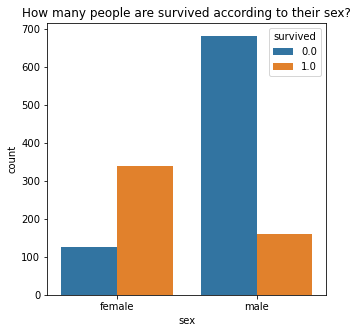

In [64]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot('sex', data=data, hue='survived')
plt.title('How many people are survived according to their sex?')
plt.show();

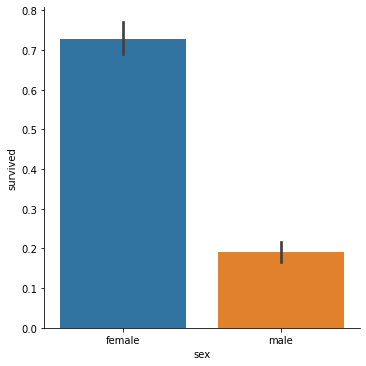

In [65]:
# Probability of survival with bar lot
sns.catplot(x='sex', y='survived', kind='bar', data=data);

#### Observations:

* Survival rate of female is much higher than male passenger.
* 72% of females were survived and less than 20% of males were survived in Titanic incident.

### How many males and females from each category of passenger class had survived?

In [66]:
# Groupby
data.groupby(['pclass', 'sex', 'survived'])['survived'].count()

pclass  sex     survived
1.0     female  0.0           5
                1.0         139
        male    0.0         118
                1.0          61
2.0     female  0.0          12
                1.0          94
        male    0.0         146
                1.0          25
3.0     female  0.0         109
                1.0         106
        male    0.0         417
                1.0          75
Name: survived, dtype: int64

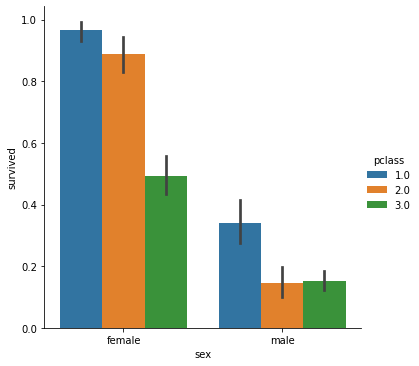

In [67]:
# Effect of Sex and Passenger Class on Survival
sns.catplot(x='sex', y='survived', kind='bar', data=data, hue='pclass');

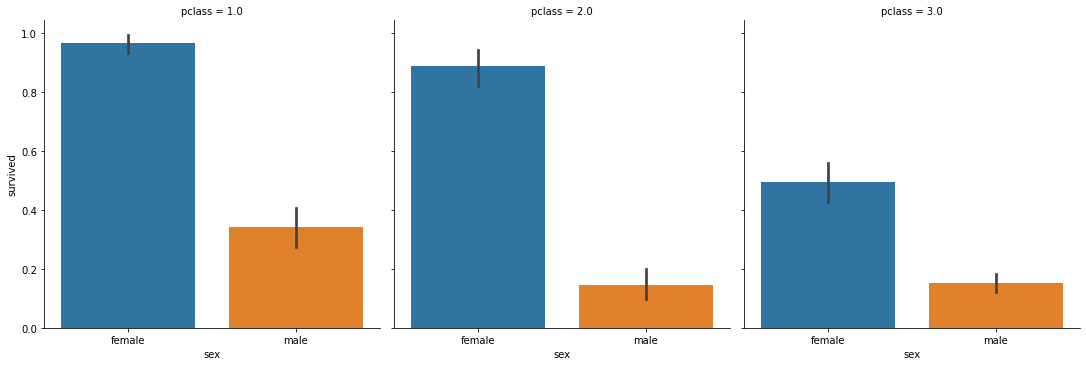

In [68]:
# Effect of Sex and Passenger Class on Survival (Pclass wise)
sns.catplot(x='sex', y='survived', kind='bar', data=data, col='pclass');

#### Observations:

* Survivals of females higher in each and every passenger class.
* Male survival rate is slightly higher in first class comapred with second and third class.

### How does sex distributed in Pclass?

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


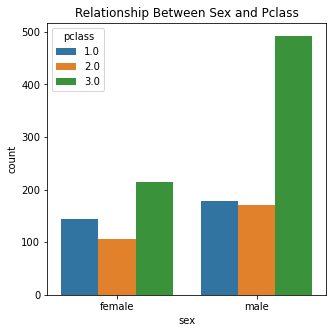

In [69]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot('sex', data=data, hue='pclass')
plt.title('Relationship Between Sex and Pclass')
plt.show();

#### Observations:

* Females were more in third class compared with first and second class.
* Males were more in third class compared with first and second class.

### Age

Since it is numeric (floating) type of variable we will be interested to understand how age is distributed amoung the total passengers.

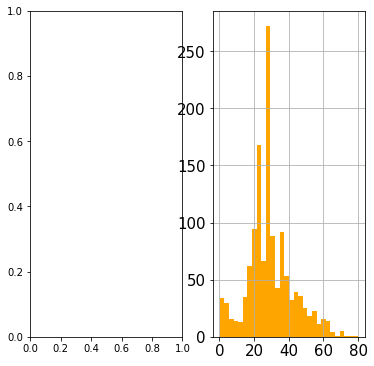

In [71]:
# Histogram
fig, ax = plt.subplots(1,2,figsize=(6,6))
data['age'].hist(bins=30, color='orange', xlabelsize=15, ylabelsize=15);

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


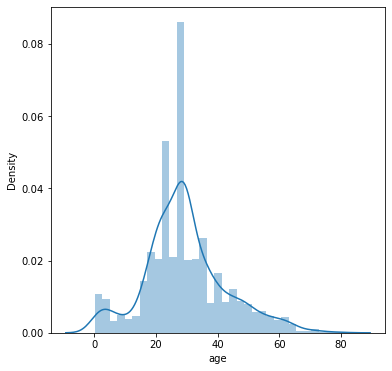

In [72]:
# Distplot
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(data['age'].dropna());

#### Observation: Most of the people were in age range of 20 to 40.

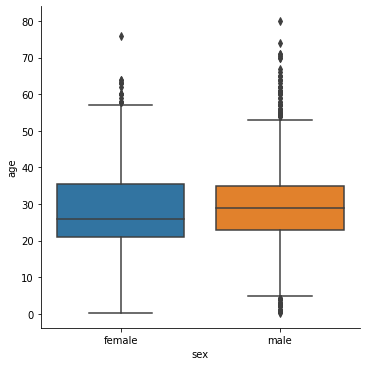

In [73]:
# boxplot to analyse age and sex of passenger
sns.catplot(x='sex', y='age', kind='box', data=data)
plt.show();

#### Observations:

* Median age of traveling in first class is more than second and third class people.
* Old age people mostly preferered to travel by first class

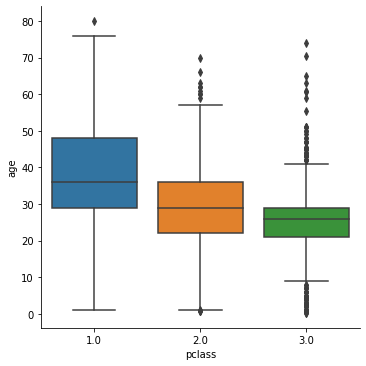

In [74]:
# age of people wrt class
sns.catplot(x='pclass', y='age', kind='box', data=data)
plt.show();

#### Observations:

* Median age of traveling in first class is more than second and third class people.
* Old age people mostly preferered to travel by first class

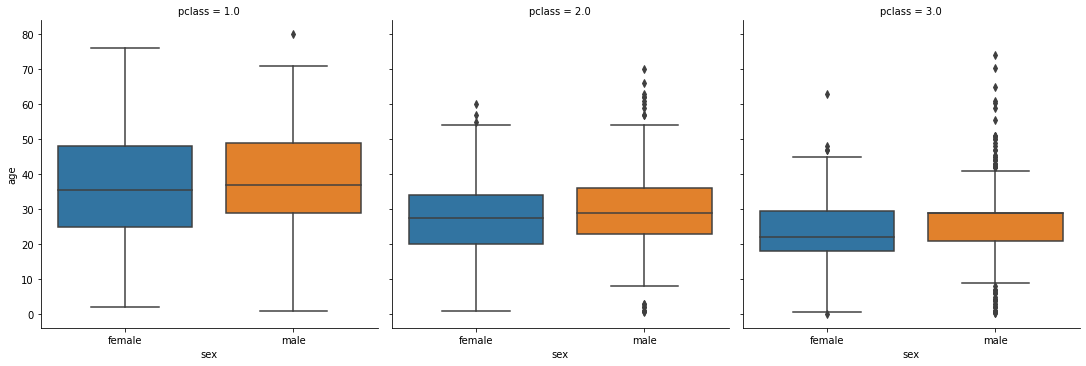

In [75]:
# boxplot to analyse age and sex of passenger with respect to class of travel
sns.catplot(x='sex', y='age', kind='box', data=data, col='pclass')
plt.show();

#### Observation:

* More old age people traveling in first class than second and third.
* Median age of males in all class slightly higher than median of female age.

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


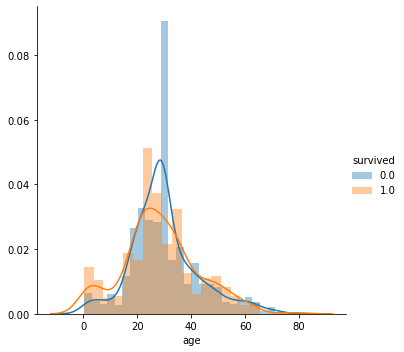

In [76]:
# Is Age variable provides us information to seperate two classes?
sns.FacetGrid(data, hue = "survived", size = 5) \
    .map(sns.distplot, "age") \
    .add_legend()
    
plt.show();

#### Observation: There is completely overlap between two classes when we try to seperate them with lone variable age. Thus age alone does not provide much information to seperate two classes.

### AgeGroup

In [77]:
#Value count
data['AgeGroup'].value_counts()

Adult             1063
Adolescence        102
Child              102
Senior Citizen      40
Name: AgeGroup, dtype: int64

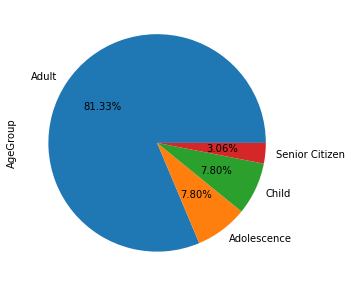

In [78]:
# Pie Chart
fig, ax = plt.subplots(figsize=(5,5))
data['AgeGroup'].value_counts().plot.pie(autopct='%1.2f%%');

### Which age group has survived mostly?

In [79]:
# GroupBy
data.groupby(['AgeGroup', 'survived'])['survived'].count()

AgeGroup        survived
Adolescence     0.0          61
                1.0          41
Adult           0.0         673
                1.0         390
Child           0.0          45
                1.0          57
Senior Citizen  0.0          28
                1.0          12
Name: survived, dtype: int64

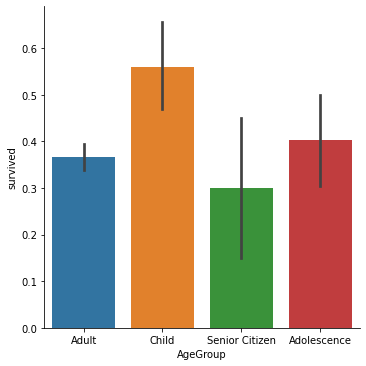

In [80]:
# Probability of survival based on age group
sns.catplot(x='AgeGroup', y='survived', kind='bar', data=data)

#### Observations:

* The probability of survival for Child and Adolescence were highest.

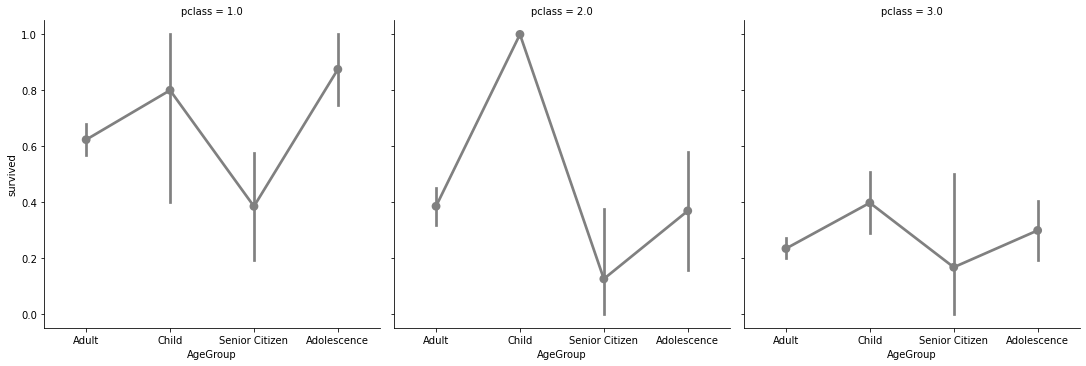

In [81]:
# Probability of survival based on age in different passenger class
sns.catplot(x='AgeGroup', y='survived', kind='point', data=data, col='pclass', color='grey');

#### Observations:

* Old age people survival probability is high in first class compared to other two class.
* In second class probability of survival of child is highest comapred to all other classes.
* Probbaility of survival of Adult is highest in First class compared to all other classes.

### Sibsp

In [82]:
# Value Count
data['sibsp'].value_counts()

0.0    889
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


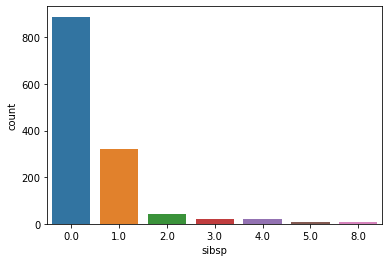

In [83]:
# count plot
sns.countplot('sibsp', data=data);

#### Observation: There are more more people were traveling as a single than with spouse and siblings.

In [84]:
# Survival Vs Sibsp
data.groupby(['sibsp', 'survived'])['survived'].count()

sibsp  survived
0.0    0.0         580
       1.0         309
1.0    0.0         156
       1.0         163
2.0    0.0          23
       1.0          19
3.0    0.0          14
       1.0           6
4.0    0.0          19
       1.0           3
5.0    0.0           6
8.0    0.0           9
Name: survived, dtype: int64

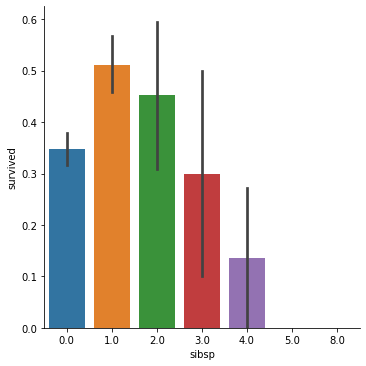

In [85]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=data);

#### Observation:

* Probability of people surviving who were traevling with one ot two spouse or siblings is higher.
* Probability of survival of people traveling in group > 4 is almost none.

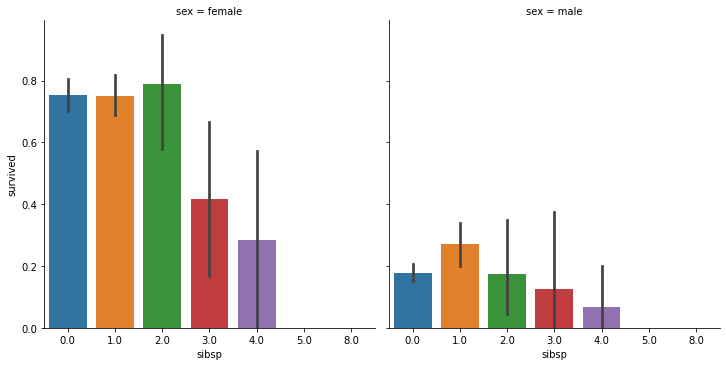

In [86]:
sns.catplot(x='sibsp', y='survived', kind='bar', col='sex',data=data);

#### Observations:

* Probability of survival of female with 2 spouse or siblings is around 80%.
* Probability of survival of female travelers is 75% when they travel alone or with 1 spouse or siblings.
* Probability of survival reduces when you travel with group contaning 4 or more people

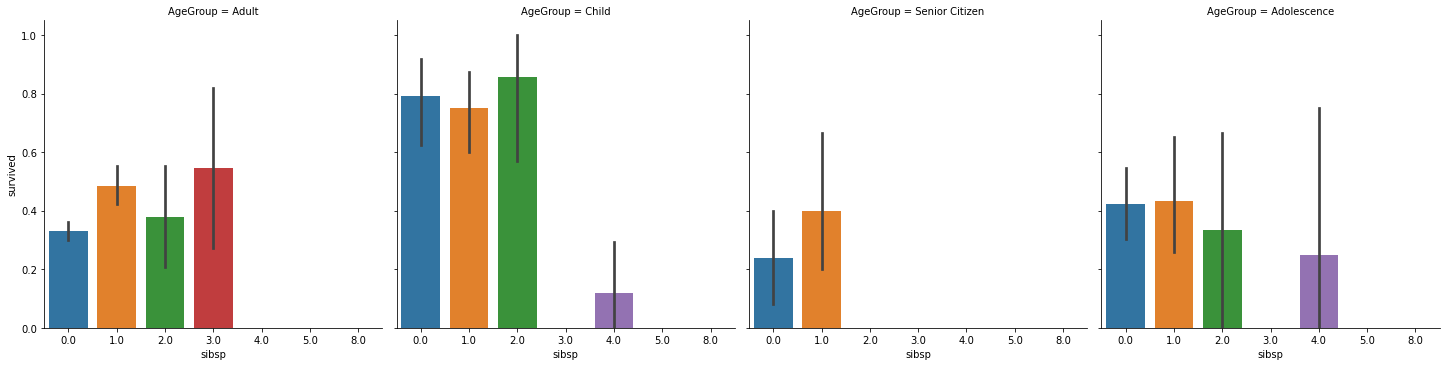

In [87]:
# Survival related to Sibsp wrt Age Binned
sns.catplot(y='survived', x='sibsp', kind='bar',col='AgeGroup', data=data);

#### Obseervation:

* In between age group of 0 to 10 --> Generally traveled along with parents.We will see that in our Parch analysis.
* In between age group of 20 to 50 --> the survival probbaility is highest when they travel with in group of 3 as spouse and siblings.
* In between age group of 50 to 80 --> the survival probbaility is highest when they travel with in group of 2 as spouse and siblings.

In [88]:
# Sibsp Vs Pclass
data.groupby(['sibsp', 'pclass'])['pclass'].count()

sibsp  pclass
0.0    1.0       198
       2.0       182
       3.0       509
1.0    1.0       113
       2.0        82
       3.0       124
2.0    1.0         8
       2.0        12
       3.0        22
3.0    1.0         4
       2.0         1
       3.0        15
4.0    3.0        22
5.0    3.0         6
8.0    3.0         9
Name: pclass, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


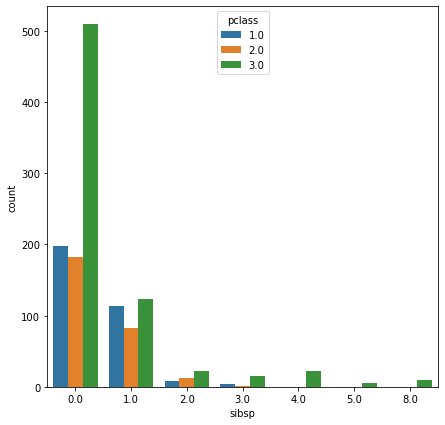

In [89]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot('sibsp', data=data, hue='pclass');

#### Observations: Most of the third class pasenger have travelled alone.

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


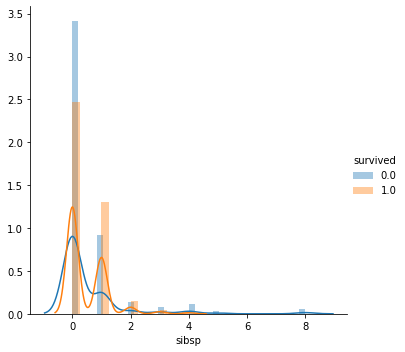

In [90]:
# Is Sibsp variable provides us information to seperate two classes?
sns.FacetGrid(data, hue = "survived", size = 5) \
    .map(sns.distplot, "sibsp") \
    .add_legend()
    
plt.show();

#### Observations: sibsp can help us to seperate two classes. There is little bit overlapping ca be seen at sibsp = 0

### Parch

#### of parents / children aboard the Titanic

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


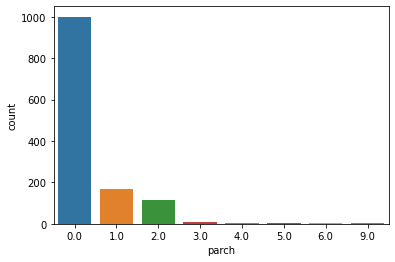

In [91]:
# count plot
sns.countplot('parch', data=data);

In [92]:
# Survived Vs Parch
data.groupby(['parch', 'survived'])['survived'].count()

parch  survived
0.0    0.0         664
       1.0         336
1.0    0.0          70
       1.0         100
2.0    0.0          56
       1.0          57
3.0    0.0           3
       1.0           5
4.0    0.0           5
       1.0           1
5.0    0.0           5
       1.0           1
6.0    0.0           2
9.0    0.0           2
Name: survived, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


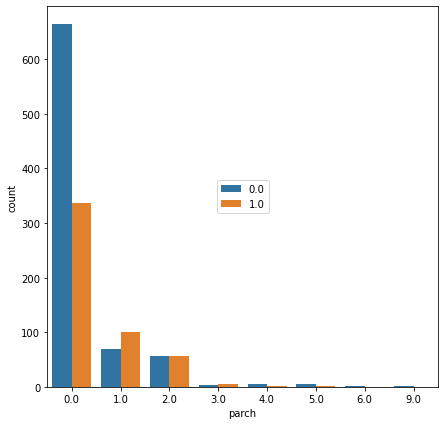

In [93]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot('parch', data=data, hue='survived')
plt.legend(loc='center');

#### Observations:

* Those who were traveling alone or single travelers were most affected by this disaster.
* People with more than 3 child or parents traveling were few on titanic

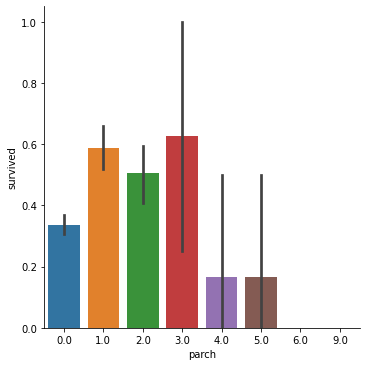

In [94]:
# Probability of survival with respect to parch
sns.catplot(x='parch', y='survived', data=data, kind='bar');

#### Observations:

* People with Parch 3 or 1 had higher probability of survival.
* When Parch > 3, the probability of survival reduces

In [95]:
# Parch Vs Pclass
data.groupby(['parch', 'pclass', 'survived'])['survived'].count()

parch  pclass  survived
0.0    1.0     0.0         101
               1.0         141
       2.0     0.0         142
               1.0          64
       3.0     0.0         421
               1.0         131
1.0    1.0     0.0          14
               1.0          36
       2.0     0.0          12
               1.0          31
       3.0     0.0          44
               1.0          33
2.0    1.0     0.0           6
               1.0          21
       2.0     0.0           4
               1.0          21
       3.0     0.0          46
               1.0          15
3.0    1.0     0.0           1
               1.0           1
       2.0     1.0           3
       3.0     0.0           2
               1.0           1
4.0    1.0     0.0           1
               1.0           1
       3.0     0.0           4
5.0    3.0     0.0           5
               1.0           1
6.0    3.0     0.0           2
9.0    3.0     0.0           2
Name: survived, dtype: int64

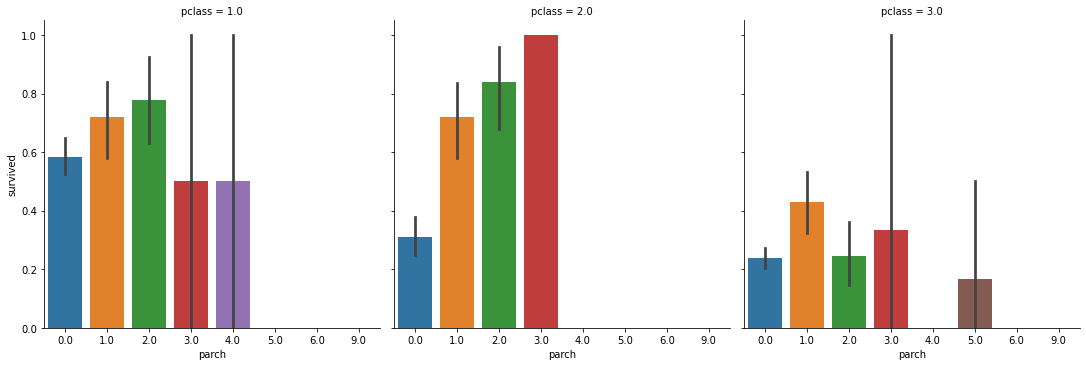

In [96]:
# Survival Vs Parch wrt pclass
sns.catplot(x='parch', y='survived', data=data, kind='bar', col='pclass');

#### Observations:

* In class 1, probability of survival is more with people with Parch 1 or 2.
* In class 2, probability of survival is more with people having parch 1, 2 and 3.
* In class 3, probability of survial is 40% when parch is 1.

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


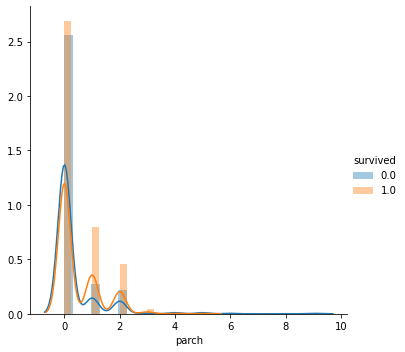

In [97]:
# Is Sibsp variable provides us information to seperate two classes?
sns.FacetGrid(data, hue = "survived", size = 5) \
    .map(sns.distplot, "parch") \
    .add_legend()
    
plt.show();

### Fare

#### Passenger fare

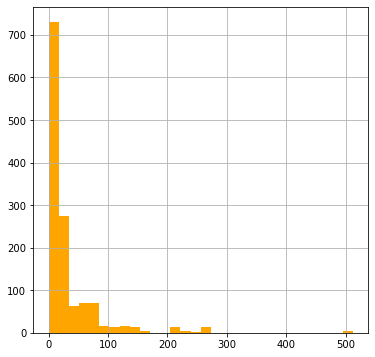

In [98]:
# How fares are distributed?
fig, ax = plt.subplots(figsize=(6,6))
data['fare'].hist(bins=30, color='orange');

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


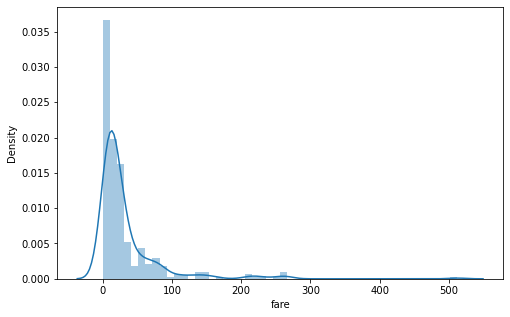

In [99]:
# Density plot
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data['fare'].dropna())
plt.show();

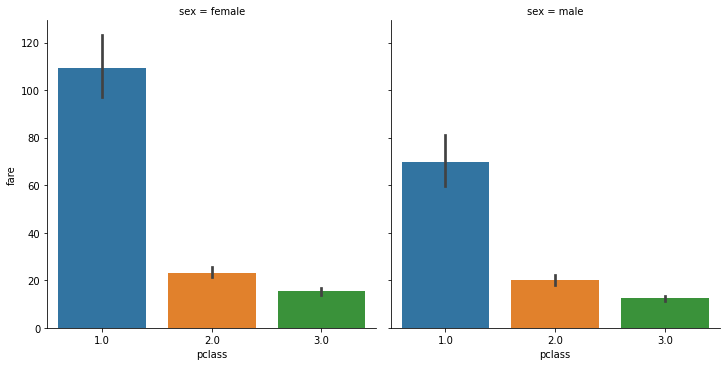

In [100]:
# Fare vs Passenger class
sns.catplot(x='pclass', y='fare', kind='bar', data=data, col='sex')
plt.show();

#### Observations:

* Ticket fare is high in first class, moderate in second class and low in third class irrespective to gender.

### Embarked Place (Boarding Place)

#### Port of Embarkation

In [101]:
# Value count
data['embarked'].value_counts()

S    915
C    270
Q    122
Name: embarked, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


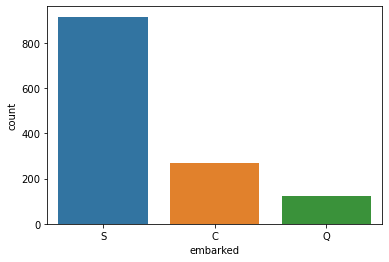

In [102]:
# countplot
sns.countplot('embarked', data=data);

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


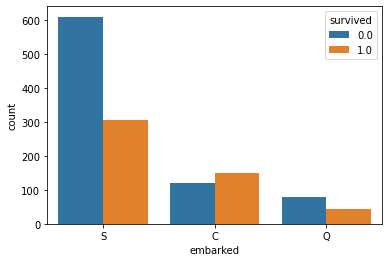

In [103]:
# Embarked vs Survival
sns.countplot('embarked', data=data, hue='survived');

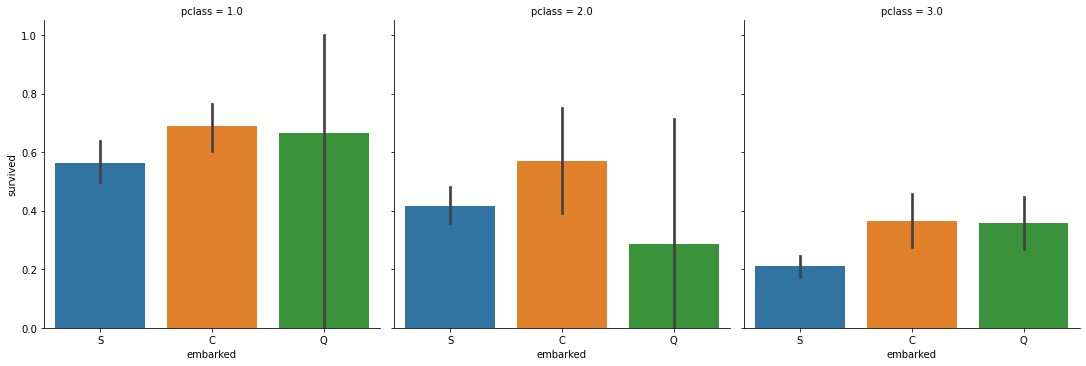

In [104]:
# Is there any relation between port of embarked and survival wrt pclass
sns.catplot(x='embarked', y='survived', data=data, kind='bar', col='pclass');

#### Observation: Probability of survival is higher if you embarked at port C

### Title

In [105]:
# value count
data['Title'].value_counts()

Mr        759
Miss      264
Mrs       200
Master     61
Rev         8
Dr          8
Col         4
Major       3
Name: Title, dtype: int64

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


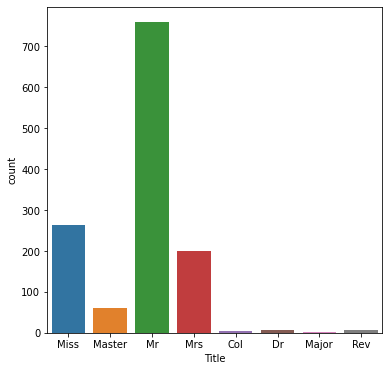

In [106]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot('Title', data=data);

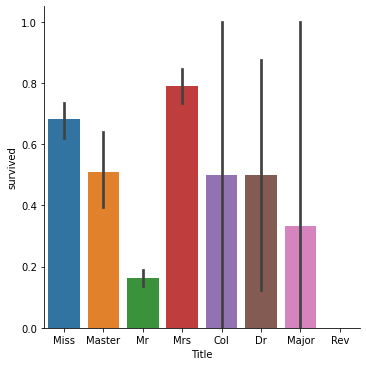

In [107]:
# Survival Vs Title
sns.catplot(x='Title', y='survived', data=data, kind='bar');

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


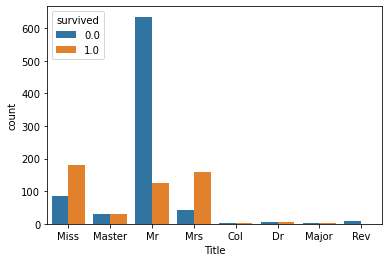

In [108]:
sns.countplot('Title', data=data, hue='survived');

### Observation:

* Most survived people had 'Miss' and 'Mrs' title.
* Mejority of people had title 'Mr' but comparatively with 'Miss' and 'Mrs' the survival rate is low.

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


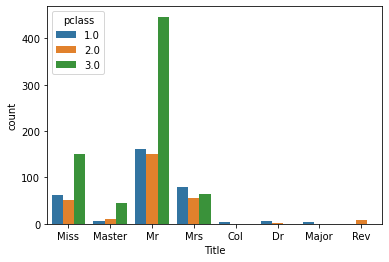

In [109]:
# Title Vs Pclass
sns.countplot('Title', data=data, hue='pclass');

#### Observation: Mejority of people titled 'Mr.' where traveling from 3rd class